In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score,classification_report

In [9]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [15]:
names=['id','clump-thickness','uniform-cell-size','uniform-cell-shape','margina-adhesion','sg-size','bare-nuclei','bland-chromatin','normal-nucleoli','mitoses','class']

In [49]:
df= pd.read_csv(url,names=names)

In [50]:
df.head()

,id,clump-thickness,uniform-cell-size,uniform-cell-shape,margina-adhesion,sg-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [60]:
df.replace('?',-99999,inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump-thickness', 'uniform-cell-size', 'uniform-cell-shape',
       'margina-adhesion', 'sg-size', 'bare-nuclei', 'bland-chromatin',
       'normal-nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [61]:
df.shape
df.drop(['id'],axis=1,inplace=True)

In [62]:
#data visualisation
df['class'].unique() # 2 is benign, 4 is malignant

array([2, 4], dtype=int64)

In [63]:
df.describe()

,clump-thickness,uniform-cell-size,uniform-cell-shape,margina-adhesion,sg-size,bland-chromatin,normal-nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


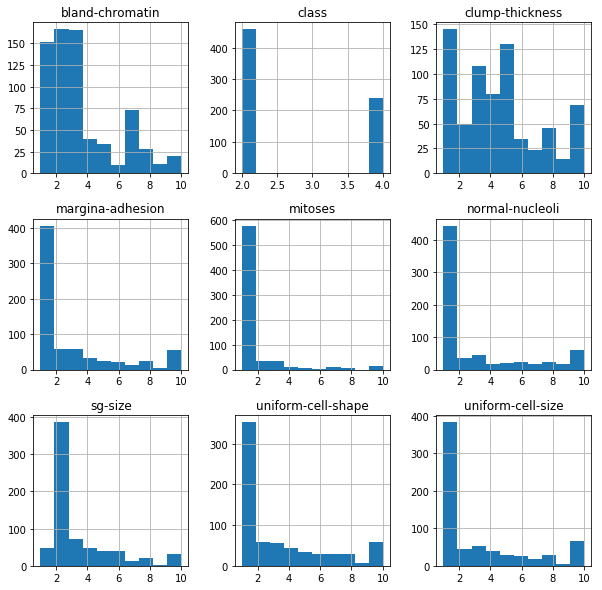

In [64]:
#mean of class variable tells us that there are slighly more benign cases than malignant.
#plotting histogram
df.hist(figsize=(10,10))
plt.show()

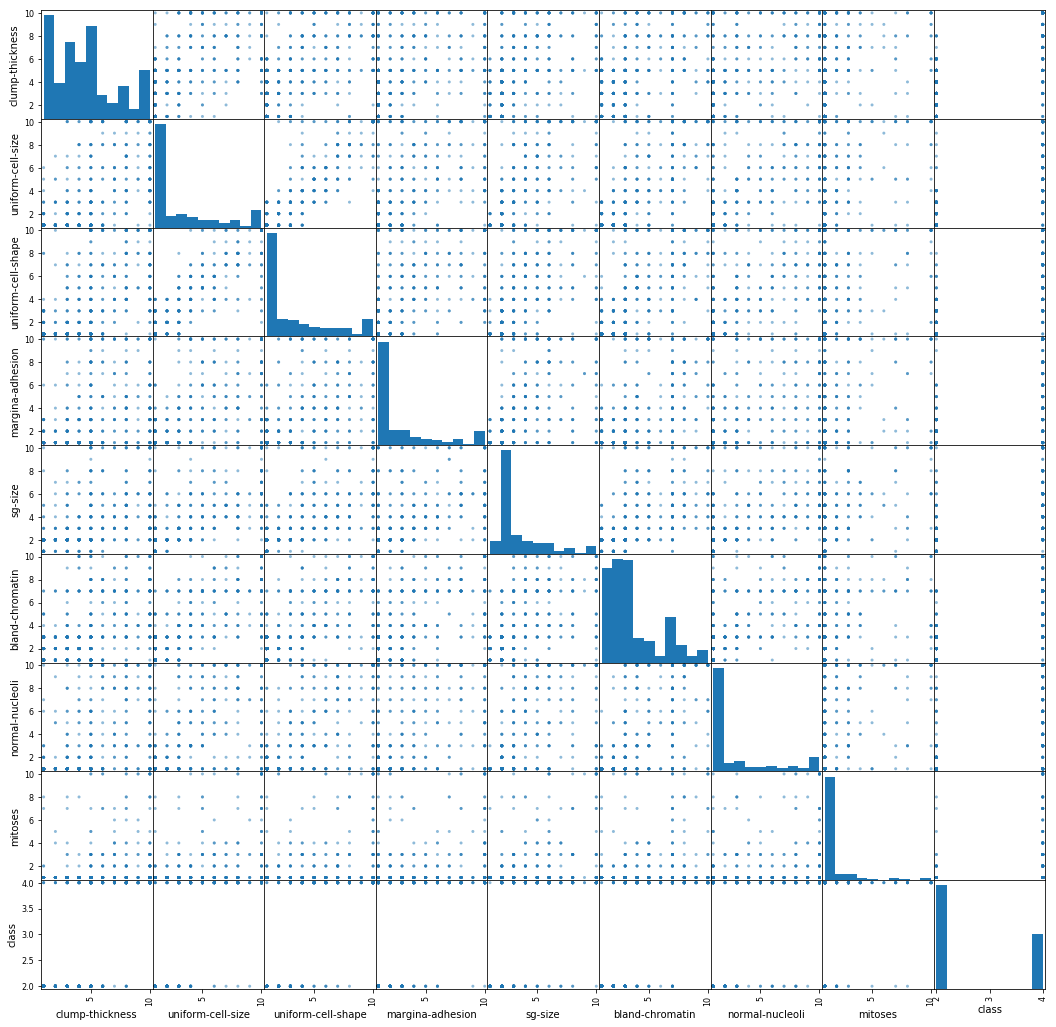

In [65]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [66]:
#Most of the variables do not show any strong linear relationship

In [84]:
# train -test split
X= np.array(df.drop(['class'],axis=1))
y=np.array(df['class'])

In [85]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=.2)

In [86]:
# random seed can make it difficult to reproduce the split set again.so using fixed seed state
seed=8
scoring='accuracy'

In [87]:
models=[]
# appending model and model parameters as dictionary
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))


In [88]:
#evaluating the models
results=[]
names=[]

for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="Name:{} Mean :{} Std:{}"
    print(msg.format(name,cv_results.mean(),cv_results.std()))

Name:KNN Mean :0.9660389610389611 Std:0.023192001837542716
Name:SVM Mean :0.9606168831168832 Std:0.017578133169588235


In [95]:
#prediction
for name, model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9642857142857143
             precision    recall  f1-score   support

          2       0.98      0.97      0.97        88
          4       0.94      0.96      0.95        52

avg / total       0.96      0.96      0.96       140

SVM
0.9357142857142857
             precision    recall  f1-score   support

          2       0.99      0.91      0.95        88
          4       0.86      0.98      0.92        52

avg / total       0.94      0.94      0.94       140



In [ ]:
#So we can see that KNN does slighly better than SVM.The precision (false positives) is better for knn than svm
# and average recall(true negatives)is better in knn as well.
# Change in train-test split can differ the results slighly.
#but given that the variables have complex relationship, non parametric classifier KNN does better if the dimensions are low